# Installment Payments Dataset Set-Up


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)

import seaborn as sns
import time
from scipy import stats

In [ ]:
app_train = pd.read_csv('app_train_red.csv', index_col = 0)
prev_apps = pd.read_csv("previous_application.csv")
pmts = pd.read_csv("installments_payments.csv")

In [ ]:
cols_2_add = pd.DataFrame(app_train["SK_ID_CURR"])
cols_2_add

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007
...,...
307506,456251
307507,456252
307508,456253
307509,456254


In [ ]:
ID = 2709276
print("The loan given was for %f and the borrower ultimately paid out %f so far on the loan, paying an extra %f. \n The payments were supposed to be %f each while the average payemnt made so far is %f."
    %(prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT, pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum(), 
        pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum() - prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT,
        prev_apps[prev_apps.SK_ID_PREV == ID].AMT_ANNUITY, pmts[pmts.SK_ID_PREV == ID].AMT_INSTALMENT.mean())
    )

pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER")

The loan given was for 900000.000000 and the borrower ultimately paid out 1268113.140000 so far on the loan, paying an extra 368113.140000. 
 The payments were supposed to be 45000.000000 each while the average payemnt made so far is 29491.003256.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8569805,2709276,342991,0.0,1,-435.0,-445.0,2250.000,2250.000
9914087,2709276,342991,0.0,2,-445.0,-445.0,14064.570,14064.570
10007697,2709276,342991,0.0,3,-432.0,-432.0,465.750,465.750
9311899,2709276,342991,0.0,4,-404.0,-421.0,10667.115,10667.115
8670446,2709276,342991,0.0,5,-421.0,-421.0,2832.885,2832.885
9654501,2709276,342991,0.0,6,-398.0,-398.0,31500.000,31500.000
8201029,2709276,342991,0.0,7,-376.0,-385.0,13094.505,13094.505
8936323,2709276,342991,0.0,8,-385.0,-385.0,405.495,405.495
10543512,2709276,342991,0.0,9,-345.0,-357.0,15064.020,15064.020
10052261,2709276,342991,0.0,10,-357.0,-357.0,685.980,685.980


# Checklist
- [ ] Who hasnt finished paying their previous loan?
- [x] Why do some contract have no term length?
- [ ] How much is left on the previous loan?
- [ ] How many late payments did each person have on their previous loan?
    - [ ] Check if people had multiple types of loans.
- [x] Why are some payments recorded but have no info of the loan itself in the previous applications dataset?

# Why do some people not have a term length for their previous loan?

<AxesSubplot:xlabel='CNT_PAYMENT', ylabel='Probability'>

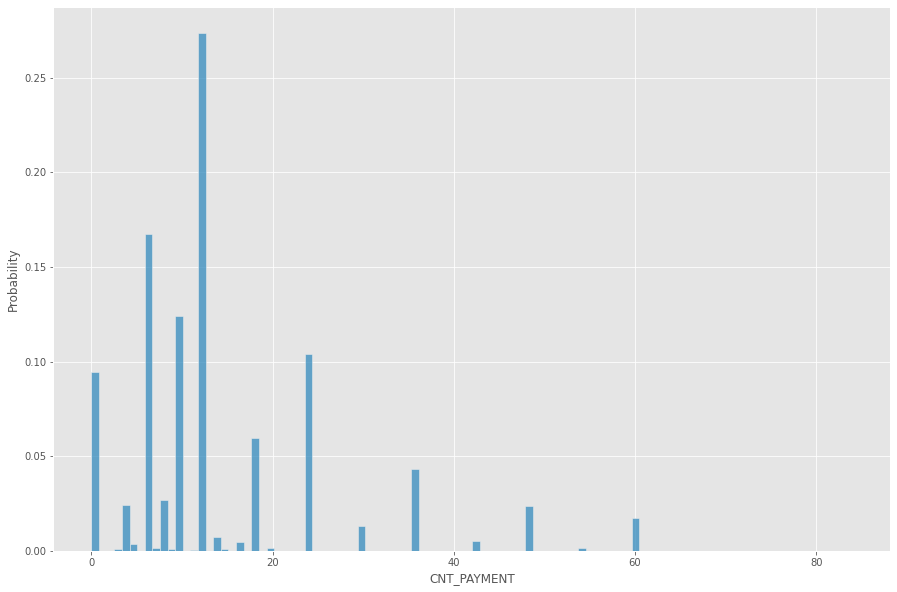

In [ ]:
sns.histplot(prev_apps.CNT_PAYMENT[prev_apps.NAME_CONTRACT_STATUS == "Approved"], bins = 100, stat = "probability")

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

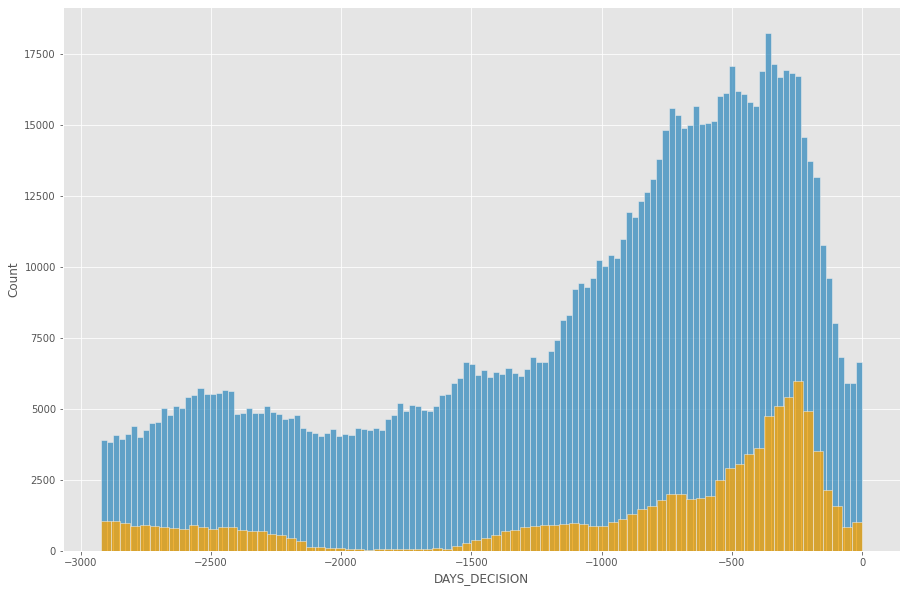

In [ ]:
sns.histplot(prev_apps[prev_apps.NAME_CONTRACT_STATUS == "Approved"].DAYS_DECISION)
sns.histplot(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].DAYS_DECISION, color = "orange")

In [ ]:
len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_CURR.isin(app_train.SK_ID_CURR)) / len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)])

1.0

In [ ]:
len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_PREV.isin(pmts.SK_ID_PREV)) / len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)])

1.0

In [ ]:
pmts[pmts.SK_ID_PREV.isin(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_PREV)]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.74
12,1570206,147645,0.0,20,-761.0,-761.0,21.510,21.51
14,1594684,100193,0.0,56,-1153.0,-1153.0,301.860,301.86
18,2391610,183431,0.0,20,-1680.0,-1693.0,7875.000,7875.00
40,2270983,159586,0.0,30,-2022.0,-2046.0,9000.000,1800.00
...,...,...,...,...,...,...,...,...
13605389,2186857,428057,0.0,69,-1532.0,NaN,67.500,NaN
13605393,1285736,434069,0.0,73,-853.0,NaN,67.500,NaN
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

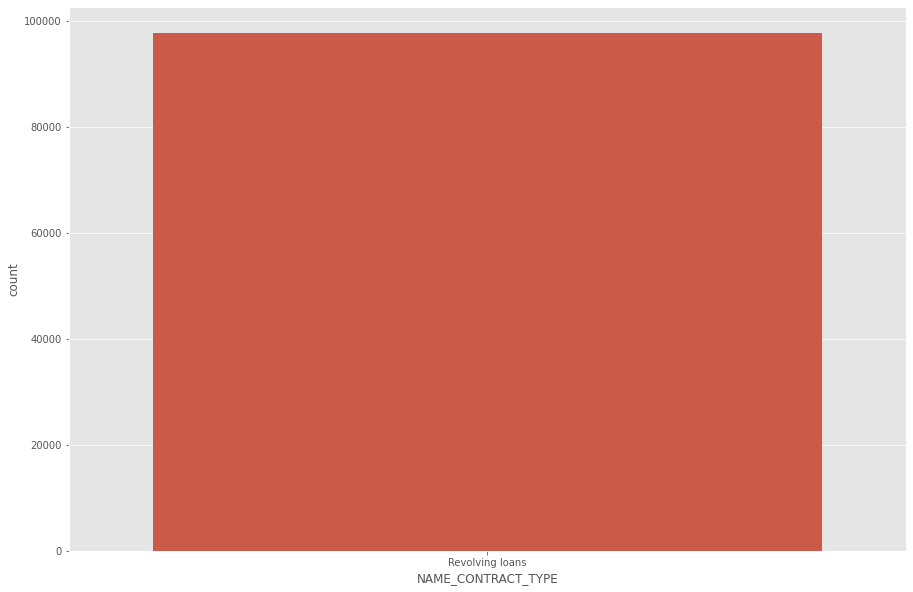

In [ ]:
sns.countplot(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].NAME_CONTRACT_TYPE)

It finally hit me. The people who do not have a predetermined amount of payments left on the previous credit application, ie CNT_PAYMENT = 0, and whose applications were approved applied for a REVOLVING LOAN. They can use their loan amount like a credit card, using it as they please so long as they make the payments. Also makes sense why their payment values fluctuate, but then this calls into question what the AMOUNT ANNUITY in the previous application column serves for then.  

# Has anyone not began making payments or not made any payments at all?

In [ ]:
# There are a few people who are not in the payments dataset but have previously approved loans, but the majority of them are. May be recent loans

print(pd.Series(pmts.SK_ID_PREV.unique()).isin(pd.Series(prev_apps.SK_ID_PREV.unique())).sum())
pd.Series(pmts.SK_ID_PREV.unique()).isin(pd.Series(prev_apps.SK_ID_PREV.unique())).sum() / len(pmts.SK_ID_PREV.unique())

958905


0.9610654751882232

Some people have either not made any payments at all of have not began repaying their loans. Or perhaps never used it, thus no payments were needed,


## People that have made payments on loans but we have no info on their previous loans

In [ ]:
missing_borrowers = pmts[~pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV)].sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])
print(len(missing_borrowers.SK_ID_PREV.unique()))
missing_borrowers.head()

38847


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
12093729,1000021,419785,1.0,3,-2908.0,-2908.0,11196.225,11196.225
11754454,1000021,419785,1.0,4,-2878.0,-2878.0,11196.225,11196.225
12836059,1000021,419785,1.0,5,-2848.0,-2848.0,11177.865,11177.865
4223187,1000037,284736,1.0,7,-2894.0,-2892.0,2228.895,2228.895
7016473,1000037,284736,1.0,8,-2864.0,-2863.0,2227.725,2227.725


In [ ]:

prev_apps[prev_apps.SK_ID_PREV == ID]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
82,2709276,342991,Revolving loans,45000.0,900000.0,900000.0,NaN,900000.0,TUESDAY,13,...,XNA,0.0,XNA,Card X-Sell,-479.0,-435.0,365243.0,365243.0,365243.0,0.0


<AxesSubplot:xlabel='DAYS_INSTALMENT', ylabel='Count'>

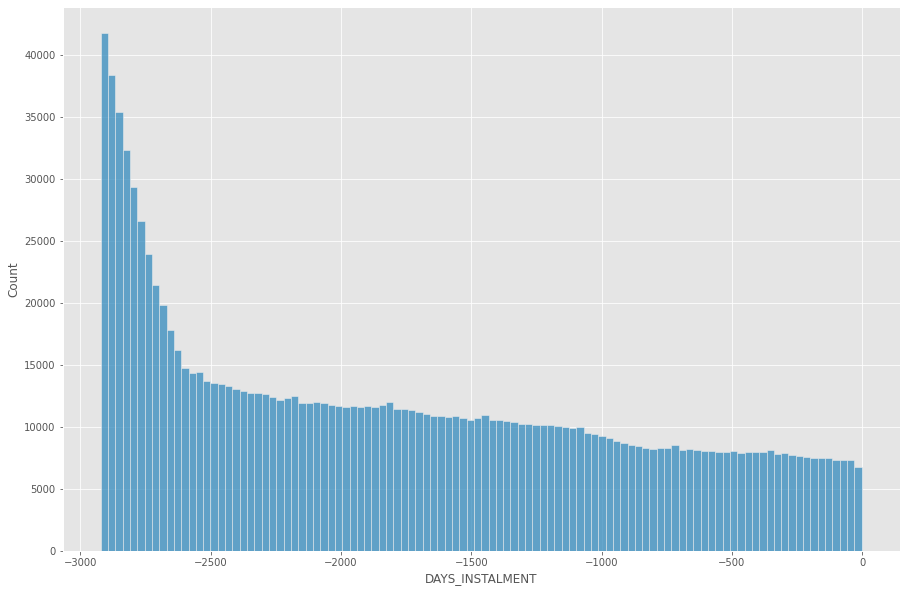

In [ ]:
# Obviously not only old loans. There are some payments that extend all the way into the current loans dataset.
sns.histplot(missing_borrowers.DAYS_INSTALMENT)

<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER', ylabel='Count'>

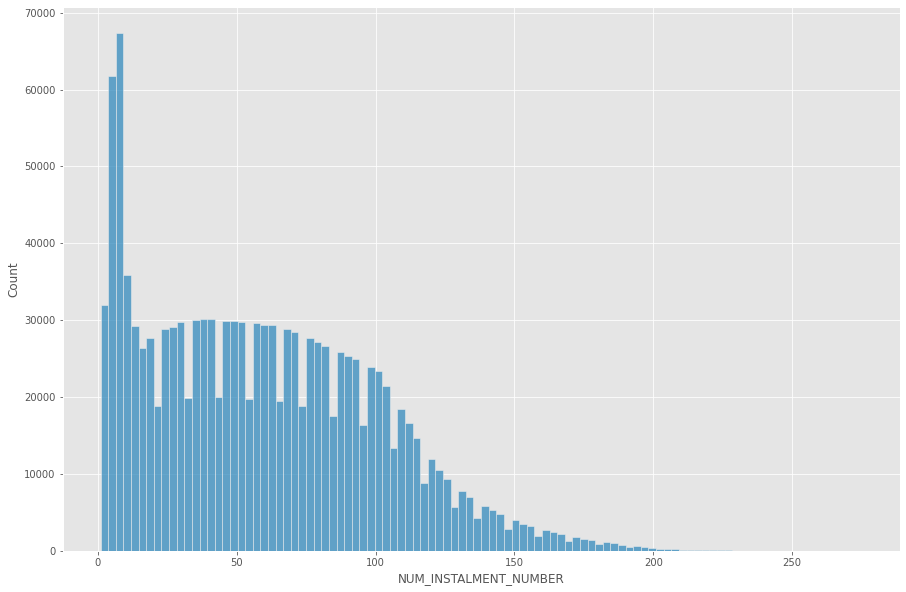

In [ ]:
sns.histplot(missing_borrowers.NUM_INSTALMENT_NUMBER, bins = 100)

<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER', ylabel='Count'>

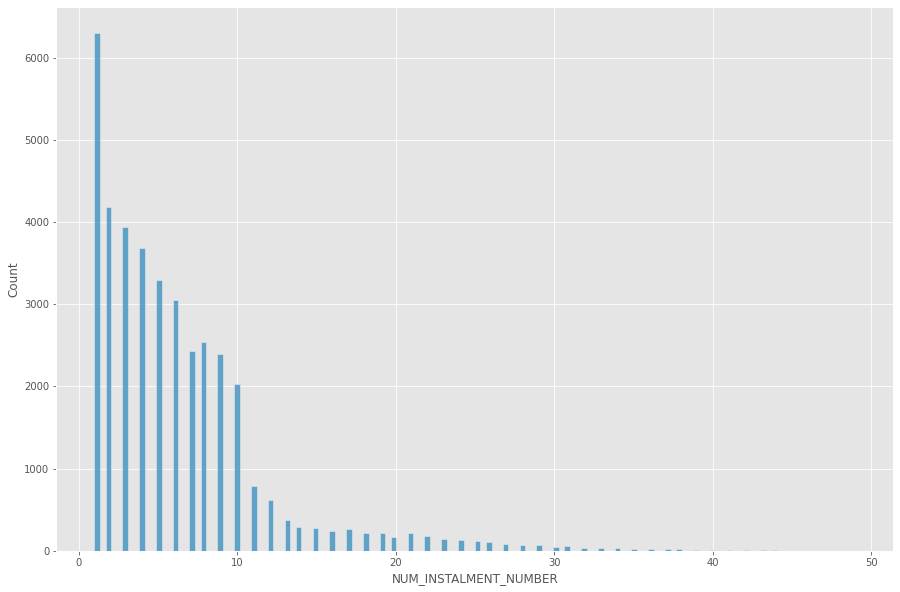

In [ ]:
# A lot of the missing borrowers first payment was the first isntallment of the loan. So why aren't they included in the data?
first_pmt = missing_borrowers.loc[missing_borrowers.groupby("SK_ID_PREV").NUM_INSTALMENT_NUMBER.idxmin()]
sns.histplot(first_pmt[first_pmt.NUM_INSTALMENT_NUMBER < 50].NUM_INSTALMENT_NUMBER)

<AxesSubplot:xlabel='DAYS_INSTALMENT', ylabel='Count'>

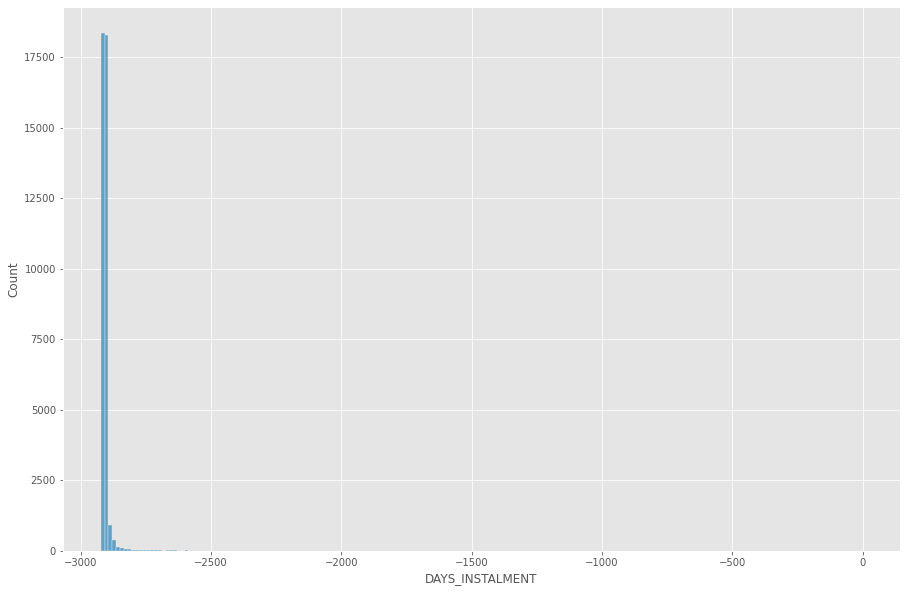

In [ ]:
sns.histplot(first_pmt.DAYS_INSTALMENT, bins = 200)

In [ ]:
missing_borrowers.SK_ID_CURR.isin(app_train.SK_ID_CURR).sum() / len(missing_borrowers)

0.8149582755715024

### Findings
- Some of the loans do extend up until the current loan. They are not strictly old loans, so there is no reason they should not be included in the previous loan dataset. Perhaps they fell through the cracks and were accidently not inculuded.
- Some of the payments are missing. There are some whose payemnts records from the beginning are not included.
    - some of the loan payments begin on the 3rd installment, for example. 
- Although some of the payments do extend to the current applications date, the first payments made on the loans were long ago, about 10 years ago in fact.
    - they may be old loans that are only now being completed. Starting to make sense why they were not included. Perhaps didnt have the records.
- About 80% of the people in the loans did apply and have a current loan, ie, included in the current loan dataset.

## Number of people with previous loans

In [ ]:
has_prev_loan = pd.DataFrame(app_train.SK_ID_CURR.isin(prev_apps.SK_ID_CURR))
has_installmts = pd.DataFrame(app_train.SK_ID_CURR.isin(pmts.SK_ID_CURR))
cols_2_add["has_prev_loan"] = (has_prev_loan | has_installmts)
cols_2_add.head(10)

,SK_ID_CURR,has_prev_loan
0,100002,True
1,100003,True
2,100004,True
3,100006,True
4,100007,True
5,100008,True
6,100009,True
7,100010,True
8,100011,True
9,100012,True


In [ ]:
ids = list(prev_apps.SK_ID_CURR.unique()) + list(missing_borrowers.SK_ID_CURR.unique())

In [ ]:
app_train.SK_ID_CURR.isin(ids).sum() / len(app_train.SK_ID_CURR.unique())

0.9514098682648751

### Findings

95% of all people in the current applications dataset have some type of previous loan, leaving the remaining ~5% of people must be new borrowers.

## Who are the people with approved loans but no payments made?

In [ ]:
no_pmts = prev_apps[~prev_apps.SK_ID_PREV.isin(pmts.SK_ID_PREV)]
print(len(no_pmts.SK_ID_PREV.unique()))
no_pmts.head()

711309


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

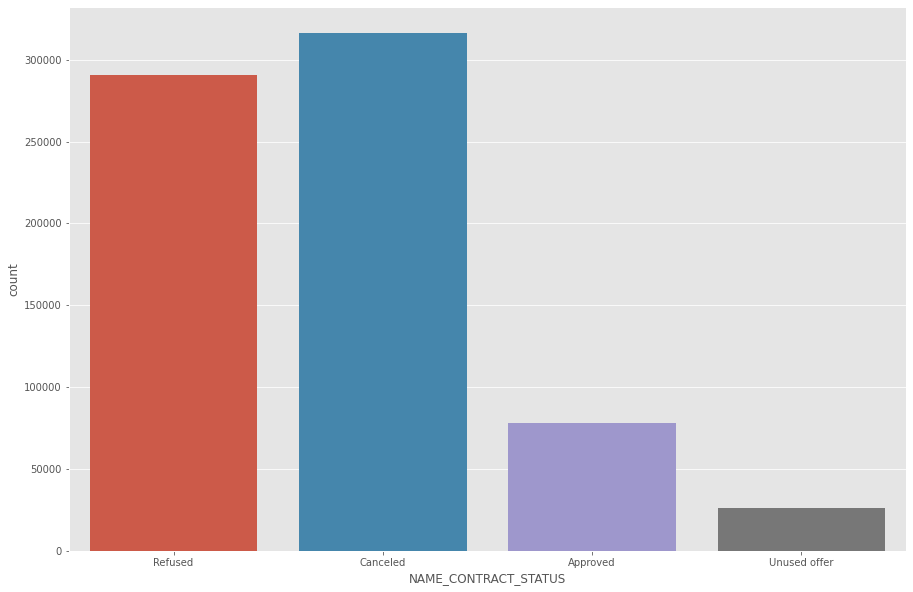

In [ ]:
# As expected, the majority of the borrowers not included in the installments dataset were refused a loan or cancelled their application.
# There is a non-significant amount of people who are not included but were approved for a loan. Perhaps they were recently approved 
    # and have no yet made any payments.
sns.countplot(no_pmts.NAME_CONTRACT_STATUS)

In [ ]:
no_pmts_approved = no_pmts[no_pmts.NAME_CONTRACT_STATUS == "Approved"]
print(len(no_pmts_approved.SK_ID_PREV.unique()))
no_pmts_approved

77876


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
18,2393109,396305,Cash loans,10181.700,180000.0,180000.0,NaN,180000.0,THURSDAY,14,...,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
47,1475738,235737,Cash loans,75897.630,2025000.0,2241513.0,NaN,2025000.0,THURSDAY,19,...,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
49,1371540,200721,Revolving loans,11250.000,225000.0,225000.0,NaN,225000.0,FRIDAY,15,...,XNA,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,-171.0,0.0
74,1385097,369423,Consumer loans,2652.705,19611.0,14170.5,6111.0,19611.0,FRIDAY,12,...,Consumer electronics,6.0,middle,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
138,1897668,205582,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,MONDAY,16,...,Consumer electronics,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670150,1556936,169693,Cash loans,18852.435,90000.0,92970.0,NaN,90000.0,THURSDAY,12,...,XNA,6.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
1670159,2354512,393355,Cash loans,20380.500,450000.0,450000.0,NaN,450000.0,WEDNESDAY,18,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670175,1176409,247954,Cash loans,9740.250,135000.0,135000.0,NaN,135000.0,THURSDAY,16,...,XNA,18.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670177,2486989,391517,Cash loans,20876.805,270000.0,299223.0,NaN,270000.0,SUNDAY,11,...,XNA,24.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


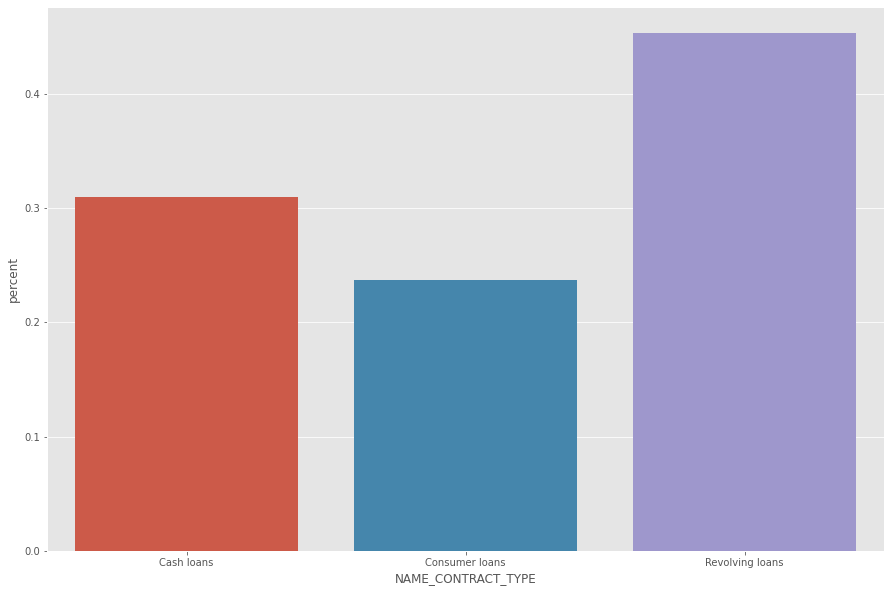

In [ ]:
perc_no_pmts = no_pmts_approved.groupby("NAME_CONTRACT_TYPE").NAME_CONTRACT_TYPE.agg(total = "count").reset_index()
perc_no_pmts["percent"] = perc_no_pmts.total / len(no_pmts_approved)
perc_no_pmts

sns.barplot(x = perc_no_pmts.NAME_CONTRACT_TYPE, y = perc_no_pmts.percent)
plt.show()

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

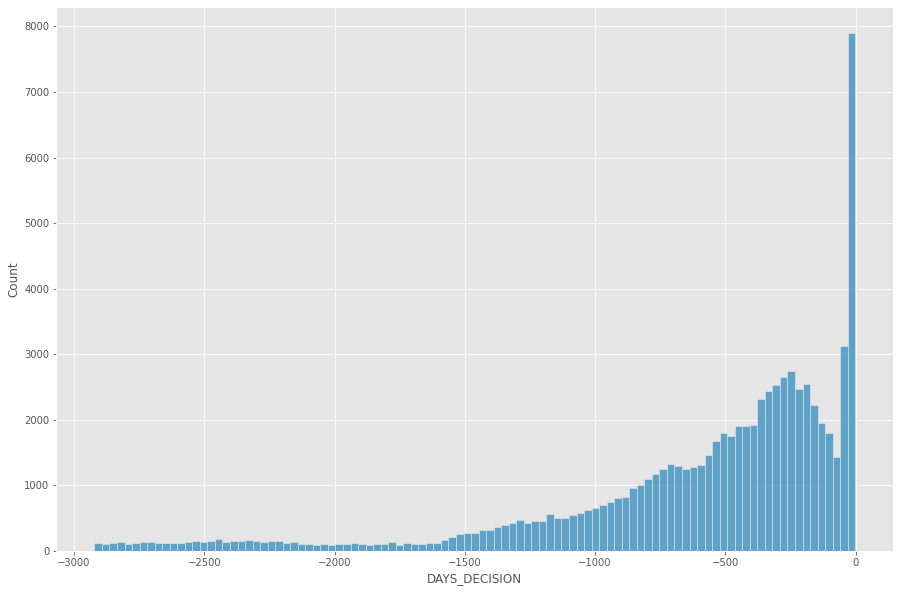

In [ ]:
sns.histplot(no_pmts_approved.DAYS_DECISION)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DAYS_DECISION', ylabel='NAME_CONTRACT_TYPE'>

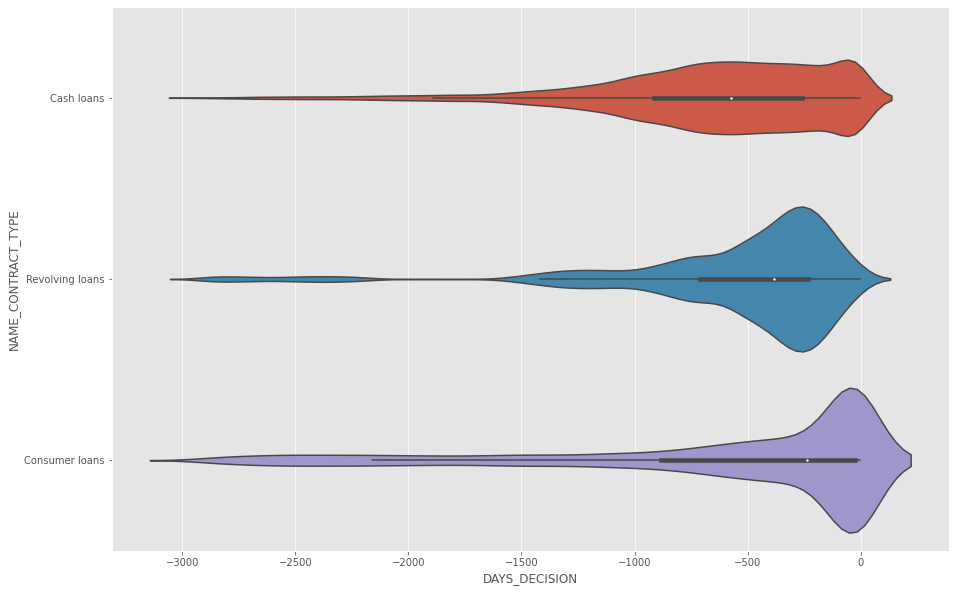

In [ ]:
sns.violinplot(no_pmts_approved.DAYS_DECISION, y = no_pmts_approved.NAME_CONTRACT_TYPE)

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

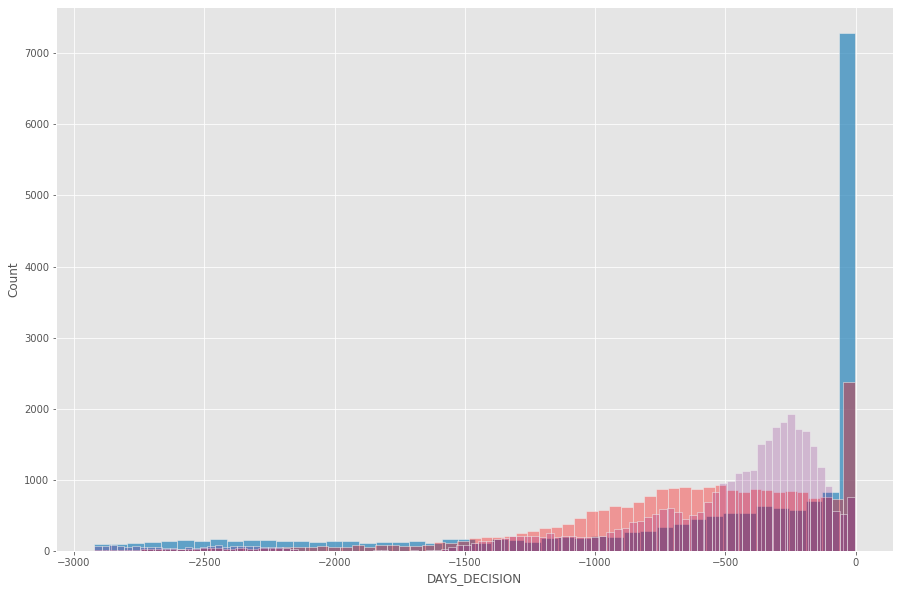

In [ ]:
sns.histplot(no_pmts_approved[no_pmts_approved.NAME_CONTRACT_TYPE == "Consumer loans"].DAYS_DECISION)
sns.histplot(no_pmts_approved[no_pmts_approved.NAME_CONTRACT_TYPE == "Cash loans"].DAYS_DECISION, color = "red", alpha = 0.35)
sns.histplot(no_pmts_approved[no_pmts_approved.NAME_CONTRACT_TYPE == "Revolving loans"].DAYS_DECISION, color = "purple", alpha = 0.2)

### Findings:
- There is a sizeable portion of people who were approved for a previous loan but are not included in the installment payments dataset for some reason. 
- Out of those approved people, about half of the were approved for revolving loans, hinting to them probably never used their credit line. 
    - As for the others, that remains a mystery. They are normal cash and consumer loans, so they have to be repaid. I highly doubt someone would take out a loan and hand it right back, which is the only way I see there would be no records of any payments required or made. 
    - Unless of course they are recent loans
- A large portion of them are very recently decided on. 
- For customers with consumer loans, the majority of them seem to the be very recent. 
- Cash loans were approved from about 5 years ago until the time of the current applications for the most part. 

# Who hasn't finished paying their loans? Who has an open balance?

## Revolving Loans

In [ ]:
rev_loans = prev_apps[(prev_apps.NAME_CONTRACT_TYPE == "Revolving loans") & (prev_apps.NAME_CONTRACT_STATUS == "Approved")]
rev_loan_pmts = pmts[pmts.SK_ID_PREV.isin(rev_loans.SK_ID_PREV)]
rev_loan_pmts.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8,2723183,112102,0.0,14,-197.0,-197.0,70.74,70.74
12,1570206,147645,0.0,20,-761.0,-761.0,21.51,21.51
14,1594684,100193,0.0,56,-1153.0,-1153.0,301.86,301.86
18,2391610,183431,0.0,20,-1680.0,-1693.0,7875.00,7875.00
40,2270983,159586,0.0,30,-2022.0,-2046.0,9000.00,1800.00


True     0.967086
False    0.032914
dtype: float64
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

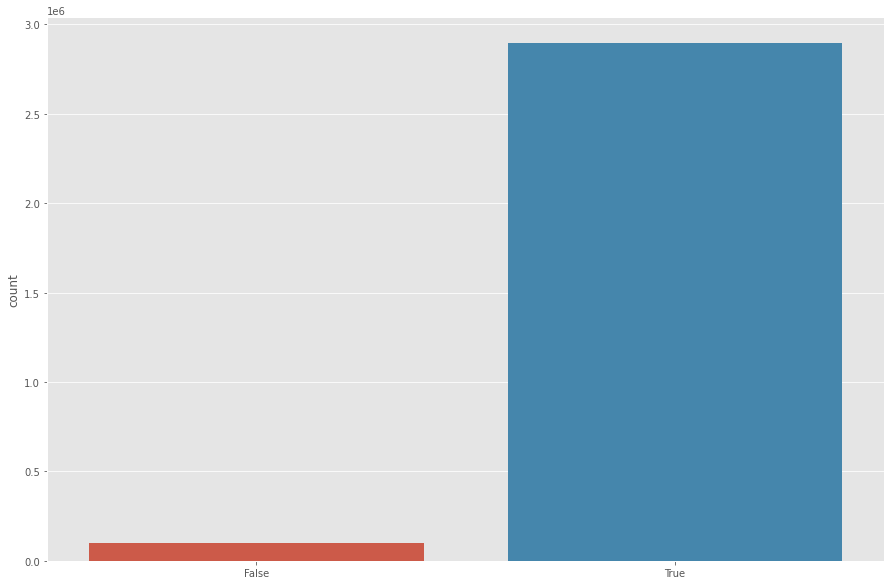

In [ ]:
print((rev_loan_pmts.AMT_PAYMENT >= rev_loan_pmts.AMT_INSTALMENT).value_counts() / len(rev_loan_pmts))
sns.countplot((rev_loan_pmts.AMT_PAYMENT >= rev_loan_pmts.AMT_INSTALMENT))

In [ ]:
rev_pmts_sums = rev_loan_pmts.groupby(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"]).AMT_PAYMENT.agg(total_payment = "sum").reset_index()
rev_pmts_sums = rev_pmts_sums.merge(rev_loan_pmts, on = ["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])
rev_pmts_sums["paid_in_full"] = rev_pmts_sums.total_payment >= rev_pmts_sums.AMT_INSTALMENT
rev_pmts_sums

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,total_payment,SK_ID_CURR,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,paid_in_full
0,1000018,1,4500.00,394447,0.0,-161.0,-161.0,4500.00,4500.00,True
1,1000018,2,4500.00,394447,0.0,-160.0,-160.0,4500.00,4500.00,True
2,1000018,3,2250.00,394447,0.0,-130.0,-132.0,2250.00,2250.00,True
3,1000018,4,900.00,394447,0.0,-132.0,-132.0,900.00,900.00,True
4,1000018,5,750.87,394447,0.0,-125.0,-125.0,750.87,750.87,True
...,...,...,...,...,...,...,...,...,...,...
2994506,2843496,28,328.23,425374,0.0,-86.0,-92.0,328.23,328.23,True
2994507,2843496,29,121.77,425374,0.0,-92.0,-92.0,121.77,121.77,True
2994508,2843496,30,121.77,425374,0.0,-77.0,-77.0,121.77,121.77,True
2994509,2843496,31,121.77,425374,0.0,-46.0,-46.0,121.77,121.77,True


True     0.99817
False    0.00183
dtype: float64
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

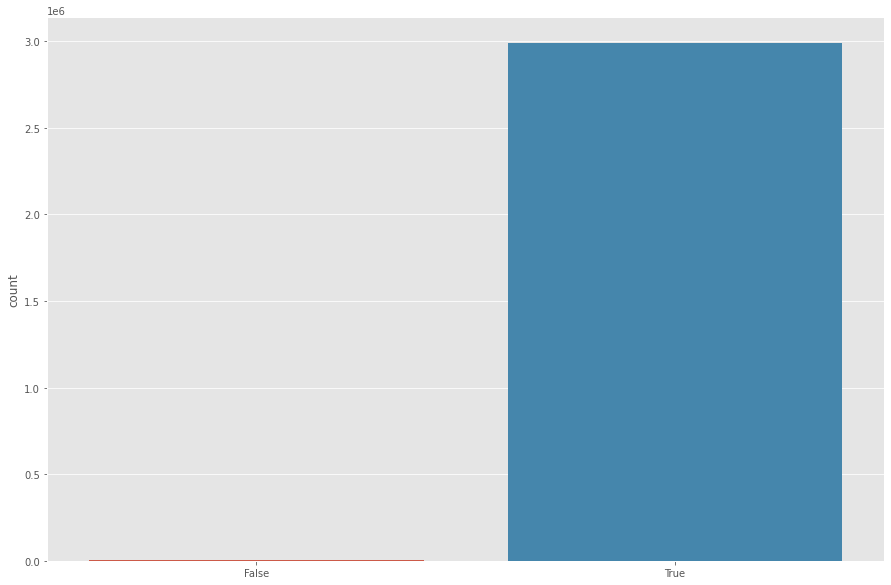

In [ ]:
print((rev_pmts_sums.total_payment >= rev_pmts_sums.AMT_INSTALMENT).value_counts() / len(rev_pmts_sums))
sns.countplot((rev_pmts_sums.total_payment >= rev_pmts_sums.AMT_INSTALMENT))

In [ ]:
# Double check on what is going on on payments made at different time for same isntallment
# Was correct, the majority of installments with multiple payments were partial payments, with most of them amounting to the total installment
# Same may have been late though
rev_pmts_sums[rev_pmts_sums.duplicated(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"], keep = False)].sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"]).head(50)

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,total_payment,SK_ID_CURR,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,paid_in_full
68,1000087,1,5449.365,399664,0.0,-913.0,-916.0,5449.365,274.365,True
69,1000087,1,5449.365,399664,0.0,-913.0,-927.0,5449.365,5175.000,True
112,1000094,2,9000.000,359175,0.0,-2597.0,-2580.0,9000.000,4500.000,True
113,1000094,2,9000.000,359175,0.0,-2597.0,-2603.0,9000.000,4500.000,True
223,1000128,3,2250.000,398841,0.0,-442.0,-445.0,2250.000,2034.000,True
224,1000128,3,2250.000,398841,0.0,-442.0,-460.0,2250.000,216.000,True
290,1000235,16,2182.410,445824,0.0,-186.0,-205.0,2182.410,1968.345,True
291,1000235,16,2182.410,445824,0.0,-186.0,-200.0,2182.410,214.065,True
293,1000235,18,225.000,445824,0.0,-156.0,-158.0,225.000,214.065,True
294,1000235,18,225.000,445824,0.0,-156.0,-175.0,225.000,10.935,True


In [ ]:
rev_pmts_sums = rev_pmts_sums[rev_pmts_sums.duplicated(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])].sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])

In [ ]:
rev_pmts_sums[rev_pmts_sums.SK_ID_CURR == 100042]

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,total_payment,SK_ID_CURR,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,paid_in_full
1872597,2137382,3,4500.0,100042,0.0,-2482.0,-2467.0,4500.0,157.5,True
1872599,2137382,4,4500.0,100042,0.0,-2451.0,-2434.0,4500.0,315.0,True


In [ ]:
full_pmts_rev = rev_pmts_sums.groupby("SK_ID_CURR").paid_in_full.sum().reset_index()
full_pmts_rev.columns = ["SK_ID_CURR", "num_full_pmts_rev"]
full_pmts_rev = full_pmts_rev.merge(rev_pmts_sums.groupby("SK_ID_CURR").paid_in_full.agg(num_pmts_rev = "count").reset_index())
full_pmts_rev

,SK_ID_CURR,num_full_pmts_rev,num_pmts_rev
0,100028,10,10
1,100042,2,2
2,100043,3,3
3,100049,1,1
4,100082,3,3
...,...,...,...
23165,456158,1,1
23166,456189,0,1
23167,456213,2,2
23168,456237,1,1


In [ ]:
cols_2_add = cols_2_add.merge(full_pmts_rev, on = "SK_ID_CURR", how = "left")
cols_2_add

,SK_ID_CURR,has_prev_loan,num_full_pmts_rev,num_pmts_rev
0,100002,True,NaN,NaN
1,100003,True,NaN,NaN
2,100004,True,NaN,NaN
3,100006,True,NaN,NaN
4,100007,True,NaN,NaN
...,...,...,...,...
307506,456251,True,NaN,NaN
307507,456252,True,NaN,NaN
307508,456253,True,NaN,NaN
307509,456254,True,NaN,NaN


### Findings
- ~99% of all installments on revolving loans are paid either in full or above the required amount.
- <1% of all payments made were underpaid the amount due
- This takes into account all installments made as partial payments


## Consumer and Cash Loans

In [ ]:
open_loans = prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT > 0)]
open_pmts = pmts[pmts.SK_ID_PREV.isin(open_loans.SK_ID_PREV)]

In [ ]:
open_loans

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
print("The number of cash/consumer loans with no term length: %d" %len(open_loans[open_loans.CNT_PAYMENT <= 0]))
print("The number of cash/consumer loans with missing term lengths: %d" %open_loans.CNT_PAYMENT.isna().sum() )

The number of cash/consumer loans with no term length: 0
The number of cash/consumer loans with missing term lengths: 0


In [ ]:
print(open_loans.NAME_CONTRCT_STATUS.value_counts())
# print(open_loans.NAME_CONTRCT_TYPE.value_counts())

AttributeError: 'DataFrame' object has no attribute 'NAME_CONTRCT_STATUS'

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

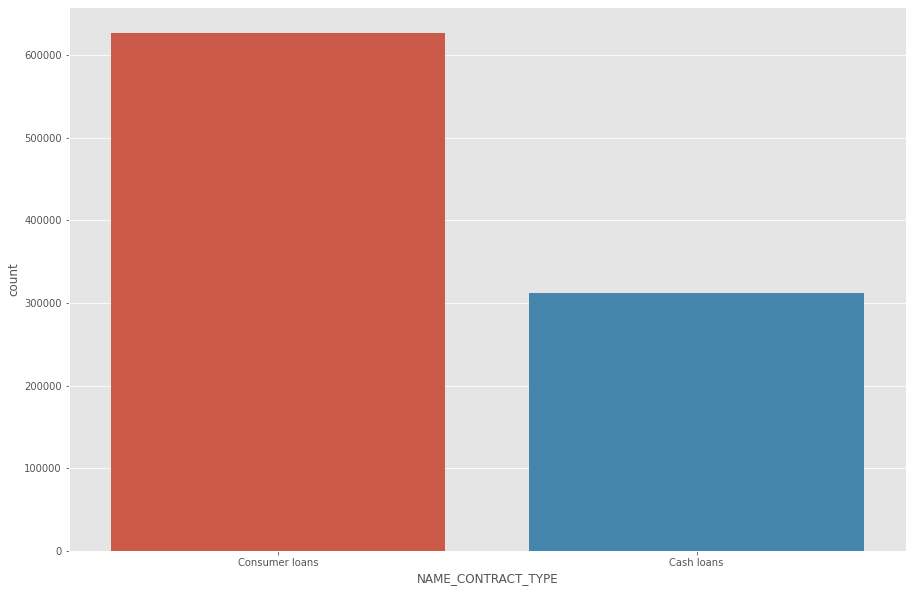

In [ ]:
sns.countplot(open_loans.NAME_CONTRACT_TYPE)

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

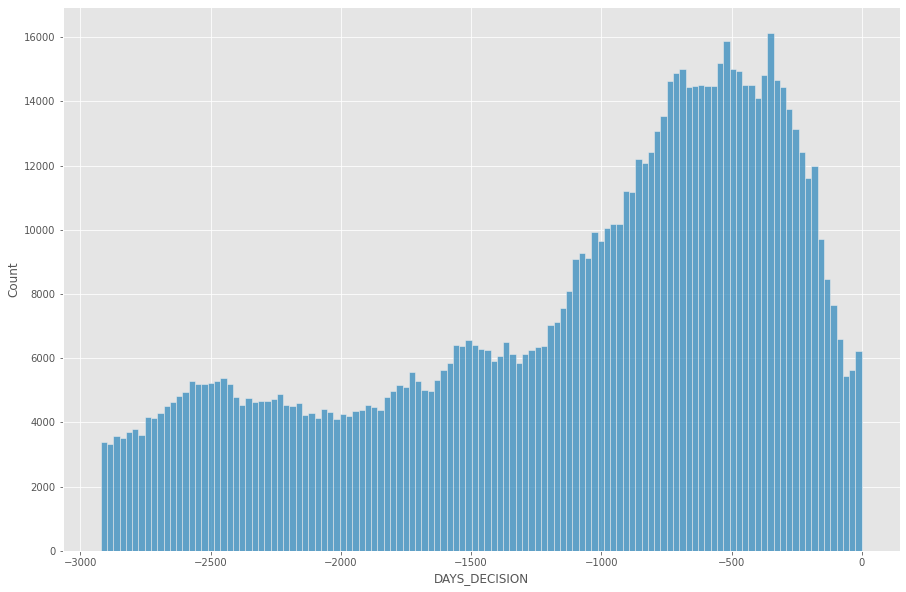

In [ ]:
sns.histplot(open_loans.DAYS_DECISION)

In [ ]:
len(open_pmts_made)

NameError: name 'open_pmts_made' is not defined

In [ ]:
temp = open_pmts_made.payments <= open_pmts_made.CNT_PAYMENT
temp.sum()

887604

In [ ]:
open_pmts_made[open_pmts_made.payments > open_pmts_made.CNT_PAYMENT]

,SK_ID_PREV,payments,CNT_PAYMENT,still_open
46,1000055,11,10.0,False
93,1000114,7,6.0,False
167,1000210,32,24.0,False
265,1000332,13,12.0,False
520,1000669,13,12.0,False
...,...,...,...,...
895717,2842499,7,6.0,False
895732,2842519,11,10.0,False
895937,2842868,13,12.0,False
896020,2842971,18,12.0,False


In [ ]:
open_pmts[open_pmts.SK_ID_PREV == 1000210].sort_values("NUM_INSTALMENT_NUMBER")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8150762,1000210,314456,1.0,1,-1061.0,-1069.0,17907.75,17907.750
11432128,1000210,314456,1.0,2,-1031.0,-1014.0,17907.75,17902.215
7862740,1000210,314456,1.0,2,-1031.0,-1069.0,17907.75,5.535
9338110,1000210,314456,1.0,3,-1001.0,-1011.0,17907.75,17907.750
8461345,1000210,314456,1.0,4,-971.0,-957.0,17907.75,17907.750
8090508,1000210,314456,1.0,5,-941.0,-957.0,17907.75,1442.250
10042351,1000210,314456,1.0,5,-941.0,-927.0,17907.75,16465.500
11104965,1000210,314456,1.0,6,-911.0,-927.0,17907.75,1444.500
9408029,1000210,314456,1.0,6,-911.0,-891.0,17907.75,16463.250
11138844,1000210,314456,1.0,7,-881.0,-886.0,17907.75,5384.250


In [ ]:
open_pmts_made = open_pmts.groupby("SK_ID_PREV").NUM_INSTALMENT_NUMBER.agg(payments = "nunique").reset_index()
open_pmts_made = open_pmts_made.merge(open_loans[["SK_ID_PREV", "CNT_PAYMENT"]])
open_pmts_made["still_open"] = open_pmts_made.payments < open_pmts_made.CNT_PAYMENT
open_pmts_made

,SK_ID_PREV,payments,CNT_PAYMENT,still_open
0,1000001,2,12.0,True
1,1000002,4,6.0,True
2,1000003,3,12.0,True
3,1000004,7,10.0,True
4,1000005,10,10.0,False
...,...,...,...,...
896420,2843494,2,48.0,True
896421,2843495,7,60.0,True
896422,2843497,20,24.0,True
896423,2843498,6,36.0,True


In [ ]:
prev_apps[prev_apps.SK_ID_PREV == 1000005]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
523289,1000005,176456,Consumer loans,14713.605,123486.075,120307.5,12349.575,123486.075,THURSDAY,13,...,Construction,10.0,middle,POS industry with interest,365243.0,-1688.0,-1418.0,-1418.0,-1415.0,0.0


In [ ]:
open_pmts[open_pmts.SK_ID_PREV == 1000005].sort_values("NUM_INSTALMENT_NUMBER")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1310691,1000005,176456,1.0,1,-1688.0,-1687.0,14713.605,14713.605
109820,1000005,176456,1.0,2,-1658.0,-1664.0,14713.605,14713.605
2255181,1000005,176456,1.0,3,-1628.0,-1636.0,14713.605,14713.605
2170925,1000005,176456,1.0,4,-1598.0,-1606.0,14713.605,14713.605
2612194,1000005,176456,1.0,5,-1568.0,-1575.0,14713.605,14713.605
3503786,1000005,176456,1.0,6,-1538.0,-1545.0,14713.605,14713.605
2892901,1000005,176456,1.0,7,-1508.0,-1512.0,14713.605,14713.605
632811,1000005,176456,1.0,8,-1478.0,-1484.0,14713.605,14713.605
1740975,1000005,176456,1.0,9,-1448.0,-1445.0,14713.605,14710.815
2618814,1000005,176456,1.0,9,-1448.0,-1484.0,14713.605,2.790


In [ ]:
14710.815 + 2.79

14713.605000000001

In [ ]:
n

### Findings
- Have to go back and fix an issue. Tried to compare the number of payments made in the installment payments dataset to the number of payments perspecified on the loan agreement
    - Mistakenly counted the number of lines in the installments dataset per each loan thinking it would give me the number of payments made so far. 
    - Did not take into account that multiple payments could be made towards the same installment due to mistakes made when making the initial payment to giving a portion of it at different points in time.
- Some customers term length exceeds what was originally agreed upon on the loan due to payments being less than what was required.


# How many late payments?

In [ ]:
pmts.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
paid_on_time = pd.DataFrame(pmts.DAYS_INSTALMENT >= pmts.DAYS_ENTRY_PAYMENT)
paid_on_time.columns = ["paid_on_time"]
paid_on_time["SK_ID_CURR"] = pmts.SK_ID_CURR
percent_on_time = paid_on_time.groupby("SK_ID_CURR").paid_on_time.agg(percent_on_time = np.mean).reset_index()
percent_on_time.head()

,SK_ID_CURR,percent_on_time
0,100001,0.857143
1,100002,1.000000
2,100003,1.000000
3,100004,1.000000
4,100005,0.888889


In [ ]:
print(len(cols_2_add))
cols_2_add = cols_2_add.merge(percent_on_time, how = "left")

307511


In [ ]:
cols_2_add[cols_2_add.has_prev_loan == False]

,SK_ID_CURR,has_prev_loan,percent_on_time
20,100024,False,NaN
26,100031,False,NaN
50,100058,False,NaN
64,100076,False,NaN
81,100096,False,NaN
...,...,...,...
307117,455813,False,NaN
307387,456113,False,NaN
307422,456155,False,NaN
307449,456187,False,NaN


In [ ]:
14942 /len(app_train)

0.04859013173512492

# Ongoing Notes:
- Attempt to find if they have an ongoing previous loan
    - can do so by comparing the number of payments (if given) in the previous application dataset to the number of payments made so far in the installments payments dataframe.
    - can use as an indicator for model if they have an ongoing previous loan. 

- Look into if there are any people who were approved for a previous loan with 0 for the CNT_PAYEMTN variable but have made payments
    - found reason, they have revolving loans instead of cash/consumer loans
    
- Find out who have missed loans.
    - can use as indicator for model on current application data


- **GATHER NEW COLUMNS 2 USE FOR MODEL**
    - got a few. Still need to find how to handle missing values corresponding to categorical variable's level, e.g.  having no previous loan implies there are no late payments 

NameError: name 'pmts' is not defined

# Looking into Payment Amounts

In [ ]:
pmts.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
total_pmts = pmts.groupby(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"]).AMT_PAYMENT.agg(total_payment = "sum").reset_index()


In [ ]:
pmts.merge(total_pmts, on = "SK_ID_PREV")

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,total_payment
0,1000001,1,6404.310
1,1000001,2,62039.115
2,1000002,1,6264.000
3,1000002,2,6264.000
4,1000002,3,6264.000
...,...,...,...
12861989,2843499,6,16074.000
12861990,2843499,7,16074.000
12861991,2843499,8,16074.000
12861992,2843499,9,16074.000


KernelInterrupted: Execution interrupted by the Jupyter kernel.

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9263f292-ea73-48e7-8892-f3d3ed1db03c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>